# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

In [34]:
import matplotlib.pyplot as plt

img_r = (plt.imread('1.gif')).astype(np.float64)
print(np.unique(img_r))

[  0.   1.   2.   3.   4.   5.   6.   8.   9.  10.  11.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  26.  27.  28.  29.  31.
  32.  34.  35.  36.  37.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  86.  87.  89.  90.  91.  92.
  93.  94.  95.  96.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 111. 112. 113. 114. 115. 117. 118. 119. 120. 121. 122. 123.
 124. 126. 127. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 159. 160. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 176. 177. 178. 179. 180. 181. 183. 184. 185.
 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199.
 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 213. 214.
 215. 

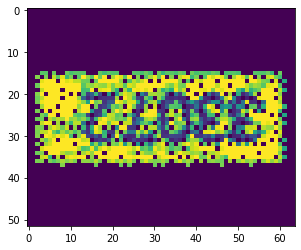

In [33]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')
#print(type(img))

plt.imshow(img)

## Apply PCA on face image

(200, 1024)


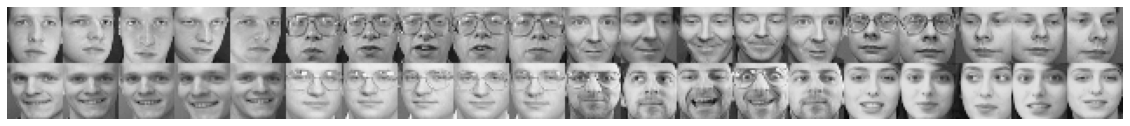

In [70]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE
print(fea_Test.shape)
# 1. Feature preprocessing
# begin answer
avg_img=np.mean(fea_Train,axis=0)
norm_img=fea_Train-avg_img
# end answer
from show_face import show_face
show_face(fea_Train)

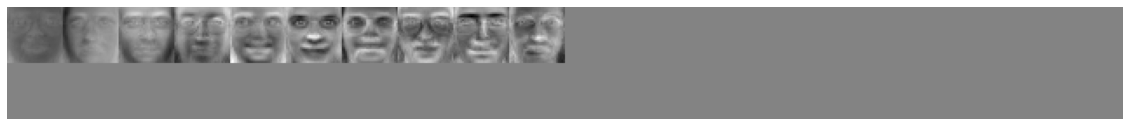

In [50]:
# 2. Run PCA
# begin answer
from pca import PCA

eigvalue,eigvector=PCA(fea_Train)

# end answer
# 3. Visualize eigenface
# begin answer
k=10
index=np.argsort(-eigvalue)
lefteigvectors=eigvector[:,index[:k]].T
feature=np.matmul(lefteigvectors,norm_img)
feature=(feature.T/np.linalg.norm(feature,axis=1)).T
show_face(feature)
# end answer

k=8 error:0.245
k=16 error:0.2
k=32 error:0.18
k=64 error:0.15


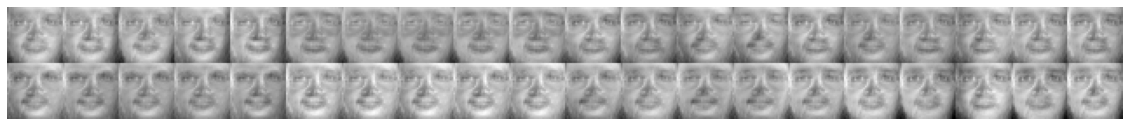

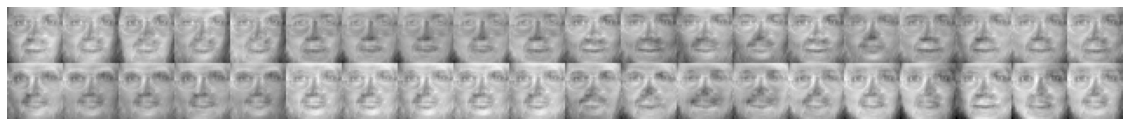

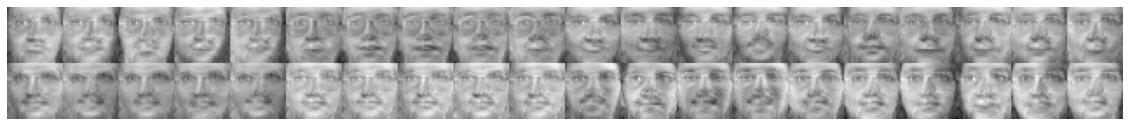

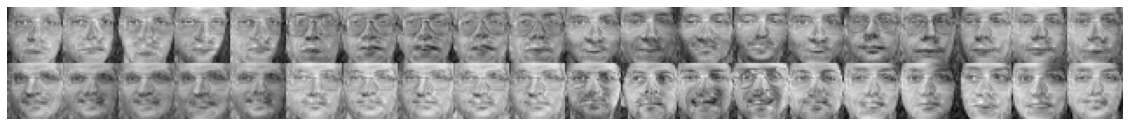

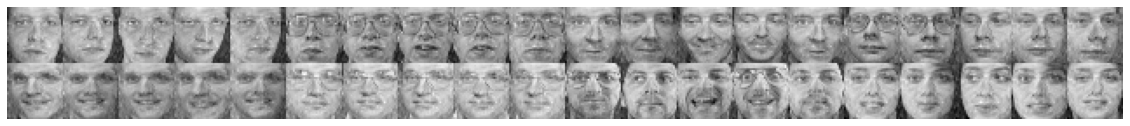

In [72]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
for k in [8,16,32,64]:
    index=np.argsort(-eigvalue)
    lefteigvectors=eigvector[:,index[:k]].T
    feature=np.matmul(lefteigvectors,norm_img)
    feature=(feature.T/np.linalg.norm(feature,axis=1)).T

    x_train=np.matmul(fea_Train,feature.T)
    x=np.matmul(fea_Test,feature.T)
    y_predict=knn(x,x_train,gnd_Train,1)
    print('k={} error:{}'.format(k,np.sum(y_predict!=gnd_Test)/gnd_Test.shape[0]))
# end answer

# 5. Run KNN in low dimensional space
# begin answer


# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
for kk in [8, 16, 32, 64, 128]:
    index=np.argsort(-eigvalue)
    lefteigvectors=eigvector[:,index[:kk]].T
    feature=np.matmul(lefteigvectors,norm_img)
    feature=(feature.T/np.linalg.norm(feature,axis=1)).T
    
    regface=np.matmul(np.matmul(fea_Train,feature.T),feature)
    show_face(regface)

# end answer  

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer
# end answer